In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sn 

In [2]:
tam_df = pd.read_csv(r'tam.csv')
tam_df.head()

,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,Extremely_likely,8,5,5,4,9,9,2,3,4,5,5,9
1,Quite_likely,3,5,6,5,2,2,6,4,3,4,4,2
2,Slightly_likely,2,2,2,4,2,1,1,4,4,1,3,2
3,Neither,0,1,0,0,0,0,2,0,1,1,1,2
4,Slightly_Unlikely,0,0,0,0,0,1,0,1,1,2,0,0


In [3]:
#Checking for null values 
tam_df.isna()

,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#Getting the data stats
tam_df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,1.857143,2.142857
std,2.968084,2.267787,2.609506,2.340126,3.287784,3.236694,1.951800,1.772811,1.772811,1.951800,2.115701,3.184785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.500000,3.500000,3.500000,4.000000,2.000000,1.500000,2.000000,3.500000,3.500000,3.000000,3.500000,2.000000
max,8.000000,5.000000,6.000000,5.000000,9.000000,9.000000,6.000000,4.000000,4.000000,5.000000,5.000000,9.000000


In [5]:
print('\n The mean value of each variable\n',tam_df.mean())
print('\n The median value of each variable\n',tam_df.median())
print('\n The mode value of each variable\n',tam_df.mode())



 The mean value of each variable
 Q1     1.857143
Q2     1.857143
Q3     1.857143
Q4     1.857143
Q5     1.857143
Q6     1.857143
Q7     1.857143
Q8     1.857143
Q9     1.857143
Q10    1.857143
Q11    1.857143
Q12    2.142857
dtype: float64

 The median value of each variable
 Q1     0.0
Q2     1.0
Q3     0.0
Q4     0.0
Q5     0.0
Q6     1.0
Q7     1.0
Q8     1.0
Q9     1.0
Q10    1.0
Q11    1.0
Q12    2.0
dtype: float64

 The mode value of each variable
                  Rank   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  Q11  \
0  Extremely_Unlikely  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1    Extremely_likely  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  NaN   
2             Neither  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  4.0  NaN  NaN   
3      Quite_Unlikely  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4        Quite_likely  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5   Slightly_Unlikely  NaN  NaN  NaN  NaN  NaN  NaN  NaN  N

In [43]:
tam_df.skew(axis=0,skipna=True)

Q1     1.85
Q2     0.85
Q3     1.00
Q4     0.46
Q5     2.22
Q6     2.37
Q7     1.97
Q8     0.30
Q9     0.30
Q10    0.84
Q11    0.56
Q12    2.12
dtype: float64

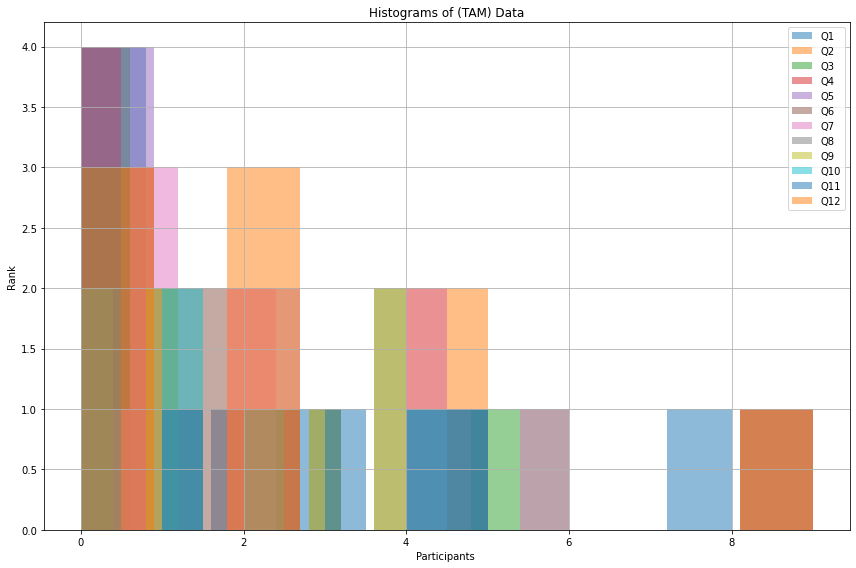

In [42]:
#Visualising our dataset' data distribution
cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6','Q7','Q8','Q9','Q10','Q11','Q12']

# Set Pandas options for display width and precision
pd.set_option('display.width', 2000)
pd.set_option('display.precision', 2)

# Create a single figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over the columns and create a histogram for each column
for col in cols:
    tam_df[col].hist(ax=ax, alpha=0.5, label=col)

# Set x-axis and y-axis labels, title, and legend
ax.set_xlabel('Participants ')
ax.set_ylabel('Rank')
ax.set_title('Histograms of (TAM) Data')
ax.legend()

# Save the figure as an image file
plt.savefig('histogram.png')

# Display the figure
plt.show()

In [8]:
tam_df.skew(axis=0,skipna=True)

Q1     1.85
Q2     0.85
Q3     1.00
Q4     0.46
Q5     2.22
Q6     2.37
Q7     1.97
Q8     0.30
Q9     0.30
Q10    0.84
Q11    0.56
Q12    2.12
dtype: float64

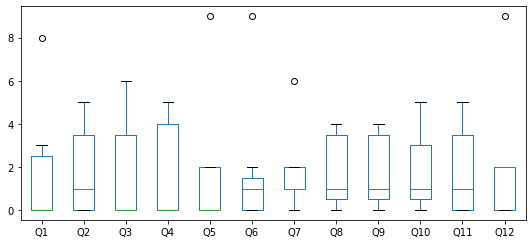

In [9]:
#checking for outliers
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = tam_df[ ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6','Q7','Q8','Q9','Q10','Q11','Q12']].plot(kind='box')
plt.savefig('box_plot.png')
plt.show()

In [10]:
from scipy.stats import f_oneway

q1 = tam_df['Q1']
q2 = tam_df['Q2']
q3 = tam_df['Q3']
q4 = tam_df['Q4']
q5 = tam_df['Q5']
q6 = tam_df['Q6']
q7 = tam_df['Q7']
q8 = tam_df['Q8']
q9 = tam_df['Q9']
q10 = tam_df['Q10']
q11 = tam_df['Q11']
q12 = tam_df['Q12']

f_statistic, p_value = f_oneway(q1, q2, q3, q4, q5, q6,q7,q8,q9,q10,q11,q12)

# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 0.007514088916718837
p-value: 0.9999999998863887


In [11]:
data = pd.read_csv(r'tam_result.csv')

In [12]:
import nltk

In [13]:
from textblob import TextBlob

In [14]:
from nltk.corpus import stopwords

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
import re

In [17]:
 pip install -U textblob

Requirement already up-to-date: textblob in c:\users\manop\anaconda3\lib\site-packages (0.17.1)
Note: you may need to restart the kernel to use updated packages.


In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    stop_words = stopwords.words('english')
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['Notes'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')


In [21]:
from textblob import TextBlob


In [22]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['clean_text'].apply(get_sentiment)

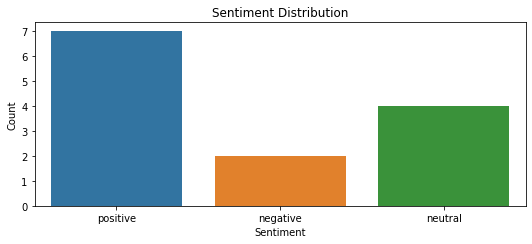

In [23]:
sn.countplot(x='sentiment', data=data)

# add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.savefig('sentiment_histogram.png')
plt.show()

In [24]:
from wordcloud import WordCloud

In [25]:
# filter the DataFrame to separate positive and negative sentiments
positive_text = ' '.join(data[data['sentiment']=='positive']['clean_text'])
negative_text = ' '.join(data[data['sentiment']=='negative']['clean_text'])

In [26]:
# generate word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)


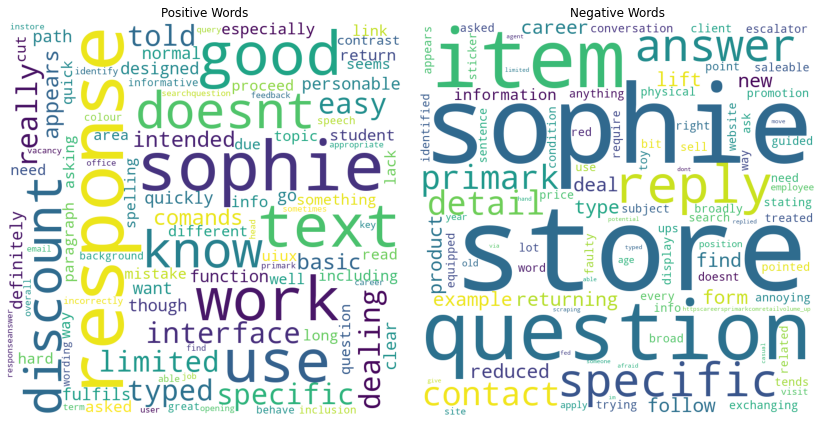

In [27]:
# plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(positive_wordcloud)
axs[0].set_title('Positive Words')
axs[0].axis('off')
axs[1].imshow(negative_wordcloud)
axs[1].set_title('Negative Words')
axs[1].axis('off')
plt.savefig('sentiment_word_cloud.png')
plt.show()

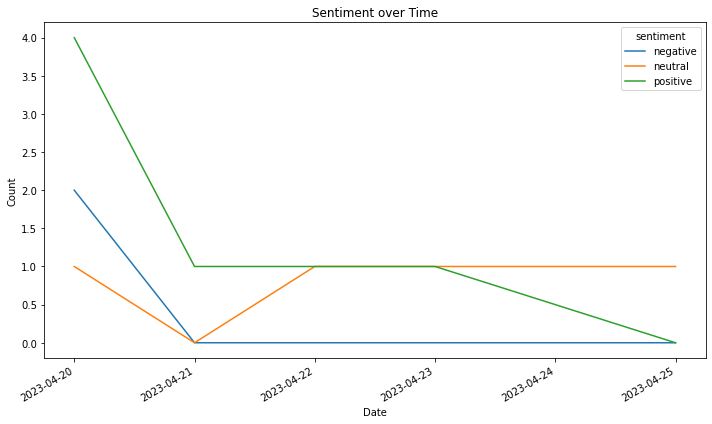

In [28]:
data['date'] = pd.to_datetime(data['date'])

# Group data by date and sentiment category
grouped = data.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Create line chart
grouped.plot(kind='line', figsize=(10, 6))

# Set chart title and axis labels
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('sentiment_line_chart.png')
# Show chart
plt.show()